## QX8800系统误差回归模型

## 探索性数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator, FormatStrFormatter
import sys
import os
sys.path.append('..')
from QX8800_DA import *
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_columns', None) #显示所有列，把行显示设置成最大
pd.set_option('display.max_rows', None) #显示所有行，把列显示设置成最大
#交互式绘图
%matplotlib widget
#Map图数据
path0 = "../BottomWafer.xlsx"
data0 = pd.read_excel(io=path0, header=[0],index_col=[0])*2

## 数据读取

In [2]:
Data_ID = '9..1'

### 读取 主EVG 数据

In [3]:
Base_EVG_html = read_data1(Data_ID)
Base_data = pd.concat([Base_EVG_html[i] for i in Base_EVG_html],axis=1)
Base_data.columns = ["M1X","M1Y","M2X","M2Y"]
Base_data.index.names = ["Die"]
Base_data = Base_data[Base_data.applymap(isnumber)].astype(np.float64)
#将EVG数据保留一份
Base_EVG_data = Base_data.copy()
Base_EVG_data

,M1X,M1Y,M2X,M2Y
Die,,,,
1,-0.207,0.709,-0.930,0.741
2,-0.492,0.285,-1.680,0.355
3,0.315,0.152,-0.707,0.591
4,0.209,0.257,-0.767,0.652
5,-0.263,-0.011,-1.410,0.440
6,0.260,0.060,-0.882,0.510
7,-0.564,-0.240,-0.635,0.229
8,0.561,-0.297,0.003,-0.247
9,-0.155,-0.138,-1.176,0.878


In [4]:
#将EVG的偏差修正为设备偏差。（符号方向）
Base_data['M1Y'], Base_data['M2Y'], Base_data['M1X'], Base_data['M2X'] = -Base_data['M1X'], -Base_data['M2X'],  Base_data['M1Y'],  Base_data['M2Y']
#data

#### 标签说明
M1Y：Mark1的Y方向偏差（EVG中的X registration）\
M1X：Mark1的X方向偏差（EVG中的Y registration）\
M2Y：Mark2的Y方向偏差（EVG中的X registration）\
M2X：Mark2的X方向偏差（EVG中的Y registration）\
MCX：Mark中心点X方向偏差\
MCY：Mark中心点Y方向偏差\
M_R：Mark的偏转角度\
M1L：Mark1偏差的length长度\
M2L：Mark2偏差的length长度\
MCL：Mark中心点偏差的矢量

#### Base-Die1右1-89

In [5]:
Base_data_1_89 = Base_data.loc[[i for i in Base_data.index if i < 90]]
#计算中心偏差
Base_data_1_89["MCX"],Base_data_1_89["MCY"] = calc_center(Base_data_1_89['M1X'],
                                                          Base_data_1_89['M1Y'],
                                                          Base_data_1_89['M2X'],
                                                          Base_data_1_89['M2Y'])
#计算最终偏转角度
Base_data_1_89["M_R"] = calc_theta(Base_data_1_89['M1X'],Base_data_1_89['M1Y'],
                                   Base_data_1_89['M2X'],Base_data_1_89['M2Y'])
Base_data_1_89["M1L"] = (Base_data_1_89['M1X']**2+Base_data_1_89['M1Y']**2)**0.5
Base_data_1_89["M2L"] = (Base_data_1_89['M2X']**2+Base_data_1_89['M2Y']**2)**0.5
Base_data_1_89["MCL"] = (Base_data_1_89['MCX']**2+Base_data_1_89['MCY']**2)**0.5
#按中心点矢量排序
Base_data_1_89.sort_values(by='MCL')

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
Die,,,,,,,,,,
57,-0.075,-0.523,0.233,0.372,0.0790,-0.0755,0.001420,0.528350,0.438945,0.109276
47,-0.312,0.060,0.536,-0.004,0.1120,0.0280,-0.002260,0.317717,0.536015,0.115447
86,-0.542,-0.399,0.352,0.238,-0.0950,-0.0805,-0.000664,0.673027,0.424909,0.124520
22,-0.313,-0.146,0.345,0.419,0.0160,0.1365,-0.000254,0.345377,0.542758,0.137435
39,0.020,-0.391,0.441,0.346,0.2305,-0.0225,0.000754,0.391511,0.560533,0.231596
79,0.056,-0.197,0.356,0.469,0.2060,0.1360,0.000881,0.204805,0.588810,0.246844
45,-0.253,-0.298,-0.051,0.706,-0.1520,0.2040,0.001949,0.390913,0.707840,0.254401
85,-0.190,-0.457,0.539,0.024,0.1745,-0.2165,-0.000635,0.494923,0.539534,0.278069
29,0.153,-0.029,0.150,0.578,0.1515,0.2745,0.001489,0.155724,0.597147,0.313532


In [ ]:
Base_data_1_89.plot()

#### 1-89异常点查看

In [ ]:
Clear_value = 2.5
Base_1_89_Clear_Point = Base_data_1_89[(np.abs(Base_data_1_89['M1X']) > Clear_value) | 
                                       (np.abs(Base_data_1_89['M1Y']) > Clear_value) | 
                                       (np.abs(Base_data_1_89['M2X']) > Clear_value) | 
                                       (np.abs(Base_data_1_89['M2Y']) > Clear_value)]
Base_1_89_Clear_Point

In [6]:
#若有异常数据，需要剔除 df.loc[[异常芯片号],:] = np.nan
Base_data_1_89.loc[Base_1_89_Clear_Point.index.to_list(),:] = np.nan
Base_data_1_89_mean = Base_data_1_89.mean()[:4].to_list()
print(f'Base_data_1_89_mean：{Base_data_1_89_mean}')
Base_data_1_89.iloc[:,:4].describe()

Base_data_1_89_mean：[0.03843055555555555, 0.04684722222222223, 0.4856493506493506, 0.7610519480519481]


,M1X,M1Y,M2X,M2Y
count,72.000000,72.000000,77.000000,77.000000
mean,0.038431,0.046847,0.485649,0.761052
std,0.367532,0.582002,0.349146,0.678892
min,-0.782000,-1.105000,-0.390000,-1.438000
25%,-0.243250,-0.391500,0.305000,0.334000
50%,0.055000,0.056000,0.499000,0.804000
75%,0.294750,0.461750,0.707000,1.179000
max,0.828000,1.651000,1.191000,2.378000


#### Base-Die1左90-157

In [7]:
#提取数据
Base_data_90_157 = Base_data.loc[[i for i in Base_data.index if 89< i]]
#89号芯片以后要换符号
Base_data_90_157.iloc[:,:4] = - Base_data_90_157.iloc[:,:4]
#计算中心偏差
Base_data_90_157["MCX"],Base_data_90_157["MCY"] = calc_center(Base_data_90_157['M1X'],Base_data_90_157['M1Y'],
                                                              Base_data_90_157['M2X'],Base_data_90_157['M2Y'])
#计算最终偏转角度
Base_data_90_157["M_R"] = calc_theta(Base_data_90_157['M1X'],Base_data_90_157['M1Y'],
                                     Base_data_90_157['M2X'],Base_data_90_157['M2Y'])
#计算矢量值
Base_data_90_157["M1L"] = (Base_data_90_157['M1X']**2+Base_data_90_157['M1Y']**2)**0.5
Base_data_90_157["M2L"] = (Base_data_90_157['M2X']**2+Base_data_90_157['M2Y']**2)**0.5
Base_data_90_157["MCL"] = (Base_data_90_157['MCX']**2+Base_data_90_157['MCY']**2)**0.5
Base_data_90_157.sort_values(by='MCL')

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
Die,,,,,,,,,,
91,-0.016,0.372,-0.133,-0.554,-0.0745,-0.0910,-0.001969,0.372344,0.569741,0.117606
142,0.206,0.309,-0.105,-0.627,0.0505,-0.1590,-0.001512,0.371372,0.635731,0.166827
120,0.448,0.355,-0.024,-0.349,0.2120,0.0030,-0.000547,0.571602,0.349824,0.212021
155,0.014,0.245,-0.429,-0.442,-0.2075,-0.0985,-0.000577,0.245400,0.615959,0.229692
128,-0.277,0.601,-0.291,-0.581,-0.2840,0.0100,-0.002850,0.661763,0.649802,0.284176
99,0.260,0.785,0.150,-0.305,0.2050,0.2400,-0.002387,0.826937,0.339890,0.315634
141,0.360,0.739,0.066,-0.219,0.2130,0.2600,-0.001608,0.822023,0.228729,0.336109
139,-0.132,0.384,-0.602,-0.382,-0.3670,0.0010,-0.000703,0.406054,0.712971,0.367001
104,-0.289,0.955,-0.174,-0.243,-0.2315,0.3560,-0.003209,0.997771,0.298873,0.424651


In [ ]:
Base_data_90_157.plot()

#### 90-157异常点查看

In [ ]:
#异常点查看
Clear_value = 2.5
Base_90_157_Clear_Point = Base_data_90_157[(np.abs(Base_data_90_157['M1X']) > Clear_value) | 
                                           (np.abs(Base_data_90_157['M1Y']) > Clear_value) | 
                                           (np.abs(Base_data_90_157['M2X']) > Clear_value) | 
                                           (np.abs(Base_data_90_157['M2Y']) > Clear_value)]
Base_90_157_Clear_Point

In [8]:
#若有异常数据，需要剔除 df.loc[[异常芯片号],:] = np.nan
Base_data_90_157.loc[Base_90_157_Clear_Point.index.to_list(),:] = np.nan
Base_data_90_157_mean = Base_data_90_157.mean()[:4].to_list()
print(f'Base_data_90_157_mean：{Base_data_90_157_mean}')
Base_data_90_157.iloc[:,:4].describe()

Base_data_90_157_mean：[0.5239298245614035, 0.7452982456140351, 0.18642857142857142, -0.057017857142857134]


,M1X,M1Y,M2X,M2Y
count,57.000000,57.000000,56.000000,56.000000
mean,0.523930,0.745298,0.186429,-0.057018
std,0.370871,0.578556,0.354482,0.563460
min,-0.289000,-0.427000,-0.602000,-1.559000
25%,0.313000,0.384000,-0.059000,-0.397000
50%,0.533000,0.803000,0.152500,-0.059500
75%,0.764000,1.178000,0.395000,0.368500
max,1.363000,1.810000,1.209000,0.840000


In [9]:
Base_data_157 = pd.concat([Base_data_1_89.iloc[:,:4],Base_data_90_157.iloc[:,:4]])

### 读取 参考EVG 数据

In [10]:
Refer_EVG_html = read_data_allD1(Data_ID)
Refer_data = pd.concat([Refer_EVG_html[i] for i in Refer_EVG_html],axis=1)
Refer_data.columns = ["M1X","M1Y","M2X","M2Y"]
Refer_data.index.names = ["Die"]
Refer_data = Refer_data[Refer_data.applymap(isnumber)].astype(np.float64)
#将EVG数据保留一份
Refer_EVG_data = Refer_data.copy()
Refer_EVG_data

,M1X,M1Y,M2X,M2Y
Die,,,,
1,-1.434,0.505,-0.969,0.673
2,-1.771,0.160,-1.703,0.300
3,-0.883,-0.032,-0.726,0.518
4,-0.925,0.068,-0.803,0.571
5,-1.424,-0.200,-1.352,0.475
6,-0.871,-0.037,-0.852,0.622
7,-1.771,-0.400,-0.619,0.286
8,-0.602,-0.462,0.033,-0.176
9,-1.298,-0.365,-1.195,0.871


In [11]:
#将EVG的偏差修正为设备偏差。（符号方向）
Refer_data['M1Y'], Refer_data['M2Y'], Refer_data['M1X'], Refer_data['M2X'] = -Refer_data['M1X'], -Refer_data['M2X'],  Refer_data['M1Y'],  Refer_data['M2Y']
#Refer_data

#### Rafer-Die1右1-89

In [12]:
Refer_data_1_89 = Refer_data.loc[[i for i in Refer_data.index if i < 90]]
#计算中心偏差
Refer_data_1_89["MCX"],Refer_data_1_89["MCY"] = calc_center(Refer_data_1_89['M1X'],Refer_data_1_89['M1Y'],
                                                            Refer_data_1_89['M2X'],Refer_data_1_89['M2Y'])
#计算最终偏转角度
Refer_data_1_89["M_R"] = calc_theta(Refer_data_1_89['M1X'],Refer_data_1_89['M1Y'],
                                    Refer_data_1_89['M2X'],Refer_data_1_89['M2Y'])
Refer_data_1_89["M1L"] = (Refer_data_1_89['M1X']**2+Refer_data_1_89['M1Y']**2)**0.5
Refer_data_1_89["M2L"] = (Refer_data_1_89['M2X']**2+Refer_data_1_89['M2Y']**2)**0.5
Refer_data_1_89["MCL"] = (Refer_data_1_89['MCX']**2+Refer_data_1_89['MCY']**2)**0.5
#按中心点矢量排序
Refer_data_1_89.sort_values(by='MCL')

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
Die,,,,,,,,,,
43,-0.083,0.240,0.429,0.060,0.1730,0.1500,-0.001709,0.253947,0.433175,0.228974
85,-0.325,0.481,0.568,-0.032,0.1215,0.2245,-0.003467,0.580505,0.568901,0.255269
89,0.039,0.339,0.549,-0.310,0.2940,0.0145,-0.002849,0.341236,0.630477,0.294357
48,-0.011,0.597,0.495,-0.003,0.2420,0.2970,-0.002719,0.597101,0.495009,0.383110
69,0.371,0.002,0.409,-0.330,0.3900,-0.1640,-0.000904,0.371005,0.525529,0.423079
27,-0.260,0.602,0.945,-0.105,0.3425,0.2485,-0.004715,0.655747,0.950815,0.423153
26,-0.849,0.617,0.319,0.051,-0.2650,0.3340,-0.004279,1.049519,0.323051,0.426358
8,-0.462,0.602,-0.176,-0.033,-0.3190,0.2845,-0.002259,0.758846,0.179067,0.427436
78,-0.003,0.676,0.387,0.115,0.1920,0.3955,-0.002336,0.676007,0.403725,0.439641


<Axes: xlabel='Die'>

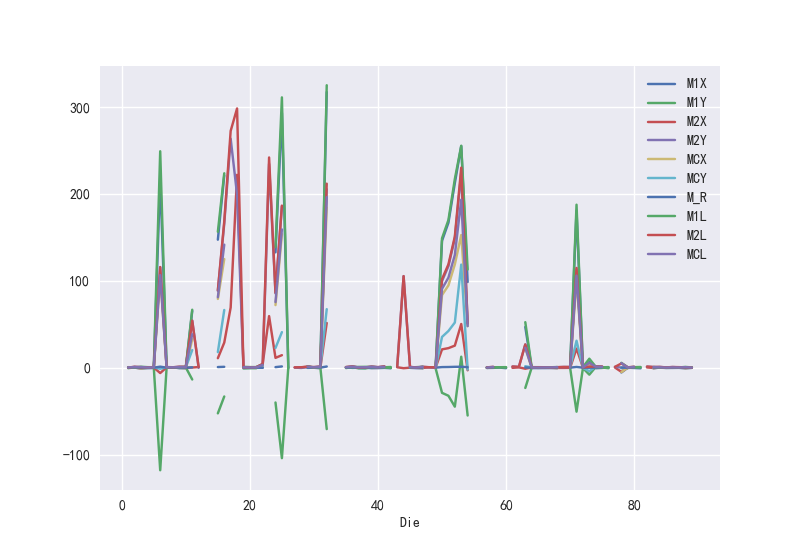

In [47]:
Refer_data_1_89.plot()

#### 1-89异常点查看

In [ ]:
#异常点查看
Clear_value = 2.5
Refer_1_89_Clear_Point = Refer_data_1_89[(np.abs(Refer_data_1_89['M1X']) > Clear_value) | 
                                         (np.abs(Refer_data_1_89['M1Y']) > Clear_value) | 
                                         (np.abs(Refer_data_1_89['M2X']) > Clear_value) | 
                                         (np.abs(Refer_data_1_89['M2Y']) > Clear_value)]
Refer_1_89_Clear_Point

In [13]:
#若有异常数据，需要剔除 df.loc[[异常芯片号],:] = np.nan
Refer_data_1_89.loc[Refer_1_89_Clear_Point.index.to_list(),:] = np.nan
Refer_data_1_89_mean = Refer_data_1_89.mean()[:4].to_list()
print(f'Rafer_data_1_89_mean：{Refer_data_1_89_mean}')
Refer_data_1_89.iloc[:,:4].describe()

Rafer_data_1_89_mean：[-0.10773033707865169, 1.1347303370786517, 0.4347977528089887, 0.7549213483146066]


,M1X,M1Y,M2X,M2Y
count,89.000000,89.000000,89.000000,89.000000
mean,-0.107730,1.134730,0.434798,0.754921
std,0.357194,0.633056,0.336992,0.664408
min,-0.978000,-0.818000,-0.392000,-1.447000
25%,-0.356000,0.746000,0.238000,0.304000
50%,-0.087000,1.155000,0.429000,0.803000
75%,0.157000,1.531000,0.654000,1.195000
max,0.658000,2.892000,1.220000,2.386000


In [14]:
#计算均值差
mean_cc_1_89 = np.array(Refer_data_1_89_mean) - np.array(Base_data_1_89_mean) 
#参考EVG减去均值差
Refer_data_1_89_new = Refer_data_1_89.iloc[:,:4].copy() - mean_cc_1_89
# #衍生数据计算
# Rafer_data_1_68_new["MCX"],Rafer_data_1_68_new["MCY"] = calc_center(Rafer_data_1_68_new['M1X'],
#                                                                     Rafer_data_1_68_new['M1Y'],
#                                                                     Rafer_data_1_68_new['M2X'],
#                                                                     Rafer_data_1_68_new['M2Y'])
# Rafer_data_1_68_new["M_R"] = calc_theta(Rafer_data_1_68_new['M1X'],
#                                         Rafer_data_1_68_new['M1Y'],
#                                         Rafer_data_1_68_new['M2X'],
#                                         Rafer_data_1_68_new['M2Y'])
# Rafer_data_1_68_new["M1L"] = (Rafer_data_1_68_new['M1X']**2+Rafer_data_1_68_new['M1Y']**2)**0.5
# Rafer_data_1_68_new["M2L"] = (Rafer_data_1_68_new['M2X']**2+Rafer_data_1_68_new['M2Y']**2)**0.5
# Rafer_data_1_68_new["MCL"] = (Rafer_data_1_68_new['MCX']**2+Rafer_data_1_68_new['MCY']**2)**0.5
Refer_data_1_89_new.describe()

,M1X,M1Y,M2X,M2Y
count,89.000000,89.000000,89.000000,89.000000
mean,0.038431,0.046847,0.485649,0.761052
std,0.357194,0.633056,0.336992,0.664408
min,-0.831839,-1.905883,-0.341148,-1.440869
25%,-0.209839,-0.341883,0.288852,0.310131
50%,0.059161,0.067117,0.479852,0.809131
75%,0.303161,0.443117,0.704852,1.201131
max,0.804161,1.804117,1.270852,2.392131


#### Refer-Die1左90-157

In [15]:
Refer_data_90_157 = Refer_data.loc[[i for i in Refer_data.index if 89 < i]]
#左侧取反
Refer_data_90_157 = -Refer_data_90_157
#计算中心偏差
Refer_data_90_157["MCX"],Refer_data_90_157["MCY"] = calc_center(Refer_data_90_157['M1X'],
                                                                Refer_data_90_157['M1Y'],
                                                                Refer_data_90_157['M2X'],
                                                                Refer_data_90_157['M2Y'])
#计算最终偏转角度
Refer_data_90_157["M_R"] = calc_theta(Refer_data_90_157['M1X'],Refer_data_90_157['M1Y'],
                                      Refer_data_90_157['M2X'],Refer_data_90_157['M2Y'])
Refer_data_90_157["M1L"] = (Refer_data_90_157['M1X']**2+Refer_data_90_157['M1Y']**2)**0.5
Refer_data_90_157["M2L"] = (Refer_data_90_157['M2X']**2+Refer_data_90_157['M2Y']**2)**0.5
Refer_data_90_157["MCL"] = (Refer_data_90_157['MCX']**2+Refer_data_90_157['MCY']**2)**0.5
#按中心点矢量排序
Refer_data_90_157.sort_values(by='MCL')

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
Die,,,,,,,,,,
113,-0.537,0.288,0.070,-0.153,-0.2335,0.0675,-0.002582,0.609355,0.168253,0.243061
104,0.148,0.238,0.044,0.216,0.0960,0.2270,0.000204,0.280264,0.220436,0.246465
149,-0.733,0.351,0.300,-0.075,-0.2165,0.1380,-0.003602,0.812705,0.309233,0.256742
95,-0.541,0.338,-0.131,-0.068,-0.3360,0.1350,-0.002008,0.637907,0.147597,0.362106
136,-0.573,-0.059,0.216,-0.581,-0.1785,-0.3200,-0.003231,0.576030,0.619852,0.366418
137,-0.770,0.223,-0.005,-0.297,-0.3875,-0.0370,-0.003167,0.801641,0.297042,0.389262
141,-0.559,0.399,-0.019,0.161,-0.2890,0.2800,-0.001920,0.686791,0.162117,0.402394
97,-0.655,0.122,-0.164,-0.184,-0.4095,-0.0310,-0.001965,0.666265,0.246479,0.410672
154,-0.719,0.403,-0.046,-0.103,-0.3825,0.1500,-0.002904,0.824239,0.112805,0.410860


In [ ]:
Refer_data_90_157.plot()

#### 90-157异常点查看

In [ ]:
#异常点查看
Clear_value = 2.5
Refer_90_157_Clear_Point = Refer_data_90_157[(np.abs(Refer_data_90_157['M1X']) > Clear_value) | 
                                             (np.abs(Refer_data_90_157['M1Y']) > Clear_value) | 
                                             (np.abs(Refer_data_90_157['M2X']) > Clear_value) | 
                                             (np.abs(Refer_data_90_157['M2Y']) > Clear_value)]
Refer_90_157_Clear_Point

In [16]:
#若有异常数据，需要剔除 df.loc[[异常芯片号],:] = np.nan
Refer_data_90_157.loc[Refer_90_157_Clear_Point.index.to_list(),:] = np.nan
Refer_data_90_157_mean = Refer_data_90_157.mean()[:4].to_list()
print(f'Rafer_data_90_157_mean：{Refer_data_90_157_mean}')
Refer_data_90_157.iloc[:,:4].describe()

Rafer_data_90_157_mean：[-0.7215294117647059, 0.38088235294117645, -0.19004411764705884, -0.008323529411764697]


,M1X,M1Y,M2X,M2Y
count,68.000000,68.000000,68.000000,68.000000
mean,-0.721529,0.380882,-0.190044,-0.008324
std,0.388493,0.583050,0.368214,0.555439
min,-1.595000,-0.643000,-1.241000,-0.866000
25%,-0.970000,-0.132750,-0.407250,-0.509000
50%,-0.716500,0.355500,-0.169000,-0.046500
75%,-0.468000,0.750750,0.044250,0.380000
max,0.148000,1.566000,0.670000,1.493000


In [17]:
#计算均值差
mean_cc_90_157 = np.array(Refer_data_90_157_mean) - np.array(Base_data_90_157_mean) 
#参考EVG减去均值差
Refer_data_90_157_new = Refer_data_90_157.iloc[:,:4].copy() - mean_cc_90_157
# #衍生数据计算
# Rafer_data_69_157_new["MCX"],Rafer_data_69_157_new["MCY"] = calc_center(Rafer_data_69_157_new['M1X'],
#                                                                     Rafer_data_69_157_new['M1Y'],
#                                                                     Rafer_data_69_157_new['M2X'],
#                                                                     Rafer_data_69_157_new['M2Y'])
# Rafer_data_69_157_new["M_R"] = calc_theta(Rafer_data_69_157_new['M1X'],
#                                         Rafer_data_69_157_new['M1Y'],
#                                         Rafer_data_69_157_new['M2X'],
#                                         Rafer_data_69_157_new['M2Y'])
# Rafer_data_69_157_new["M1L"] = (Rafer_data_69_157_new['M1X']**2+Rafer_data_69_157_new['M1Y']**2)**0.5
# Rafer_data_69_157_new["M2L"] = (Rafer_data_69_157_new['M2X']**2+Rafer_data_69_157_new['M2Y']**2)**0.5
# Rafer_data_69_157_new["MCL"] = (Rafer_data_69_157_new['MCX']**2+Rafer_data_69_157_new['MCY']**2)**0.5
Refer_data_90_157_new.describe()

,M1X,M1Y,M2X,M2Y
count,68.000000,68.000000,68.000000,68.000000
mean,0.523930,0.745298,0.186429,-0.057018
std,0.388493,0.583050,0.368214,0.555439
min,-0.349541,-0.278584,-0.864527,-0.914694
25%,0.275459,0.231666,-0.030777,-0.557694
50%,0.528959,0.719916,0.207473,-0.095194
75%,0.777459,1.115166,0.420723,0.331306
max,1.393459,1.930416,1.046473,1.444306


In [18]:
Rafer_data_157 = pd.concat([Refer_data_1_89_new,Refer_data_90_157_new])

In [ ]:
#替换新EVG两个Mark
data_calc = Base_data_157.dropna().combine_first(Rafer_data_157)

#替换新EVG单个Mark （角度会出问题）
#data_calc = Base_data_157.combine_first(Rafer_data_157)

data_EVG = Base_EVG_data.dropna().combine_first(Refer_EVG_data)

#### 3$\sigma$分析

In [28]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

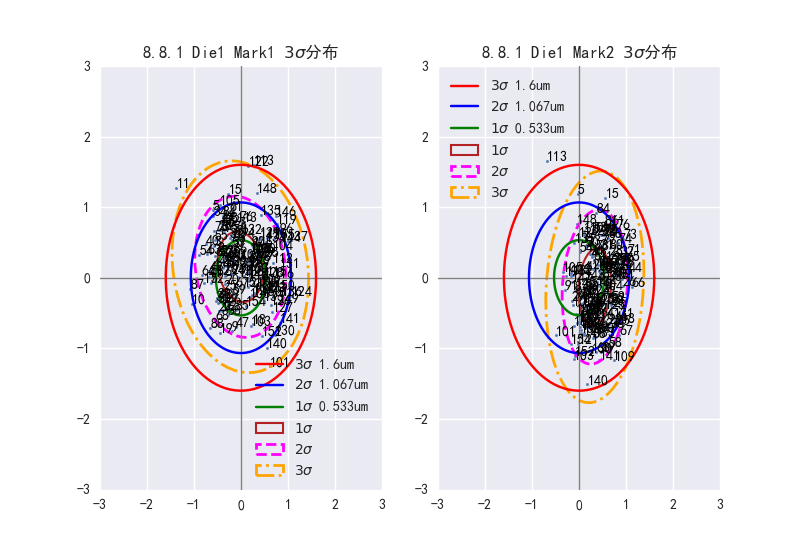

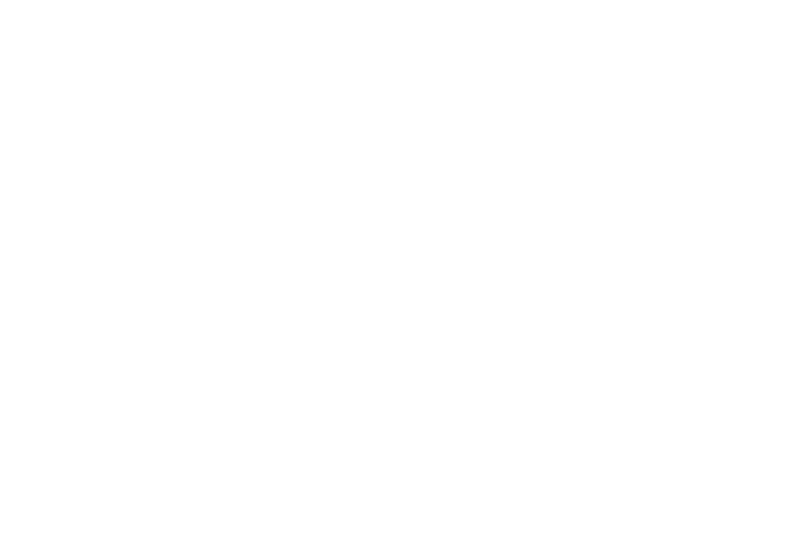

In [29]:
theta = np.linspace(0, 2*np.pi, 100)

radius1 = 0.533
a1 = radius1*np.cos(theta)
b1 = radius1*np.sin(theta)

radius2 = 1.067
a2 = radius2*np.cos(theta)
b2 = radius2*np.sin(theta)

radius3 = 1.6
a3 = radius3*np.cos(theta)
b3 = radius3*np.sin(theta)
fig, ax_nstd = plt.subplots(1,2)

ax_nstd[0].axvline(c='grey', lw=1)
ax_nstd[0].axhline(c='grey', lw=1)

x1, y1 = data_calc['M1X'].dropna().values,data_calc['M1Y'].dropna().values
ax_nstd[0].scatter(x1, y1, s=3)
for i in data_calc.dropna().index:
    ax_nstd[0].annotate(i, xy=(data_calc.loc[i,"M1X"],data_calc.loc[i,"M1Y"]),
                xytext=(data_calc.loc[i,"M1X"],data_calc.loc[i,"M1Y"]),
                color="k")
ax_nstd[0].plot(a3,b3,color='r',label=r'$3\sigma$ 1.6um')
ax_nstd[0].plot(a2,b2,color='b',label=r'$2\sigma$ 1.067um')
ax_nstd[0].plot(a1,b1,color='g',label=r'$1\sigma$ 0.533um')

confidence_ellipse(x1, y1, ax_nstd[0], n_std=1, linewidth=1.5,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x1, y1, ax_nstd[0], n_std=2, linewidth=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x1, y1, ax_nstd[0], n_std=3, linewidth=2,
                   label=r'$3\sigma$', edgecolor='orange', linestyle='-.')
ax_nstd[0].set_xlim((-3,3))
ax_nstd[0].set_ylim((-3,3))
ax_nstd[0].set_title(fr'{Data_ID} Die1 Mark1 $3\sigma$分布')
ax_nstd[0].legend()


ax_nstd[1].axvline(c='grey', lw=1)
ax_nstd[1].axhline(c='grey', lw=1)

x2, y2 = data_calc['M2X'].dropna().values,data_calc['M2Y'].values
ax_nstd[1].scatter(x2, y2, s=3)

for i in data_calc.dropna().index:
    ax_nstd[1].annotate(i, xy=(data_calc.loc[i,"M2X"],data_calc.loc[i,"M2Y"]),
                  xytext=(data_calc.loc[i,"M2X"],data_calc.loc[i,"M2Y"]),
                  color="k")
ax_nstd[1].plot(a3,b3,color='r',label=r'$3\sigma$ 1.6um')
ax_nstd[1].plot(a2,b2,color='b',label=r'$2\sigma$ 1.067um')
ax_nstd[1].plot(a1,b1,color='g',label=r'$1\sigma$ 0.533um')

confidence_ellipse(x2, y2, ax_nstd[1], n_std=1, linewidth=1.5,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x2, y2, ax_nstd[1], n_std=2, linewidth=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x2, y2, ax_nstd[1], n_std=3, linewidth=2,
                   label=r'$3\sigma$', edgecolor='orange', linestyle='-.')
ax_nstd[1].set_xlim((-3,3))
ax_nstd[1].set_ylim((-3,3))
ax_nstd[1].set_title(fr'{Data_ID} Die1 Mark2 $3\sigma$分布')
ax_nstd[1].legend()

plt.show()

### 数据分析

In [20]:
#计算中心偏差
data_calc["MCX"],data_calc["MCY"] = calc_center(data_calc['M1X'],data_calc['M1Y'],
                                                data_calc['M2X'],data_calc['M2Y'])
#计算最终偏转角度
data_calc["M_R"] = calc_theta(data_calc['M1X'],data_calc['M1Y'],
                              data_calc['M2X'],data_calc['M2Y'])
data_calc["M1L"] = (data_calc['M1X']**2+data_calc['M1Y']**2)**0.5
data_calc["M2L"] = (data_calc['M2X']**2+data_calc['M2Y']**2)**0.5
data_calc["MCL"] = (data_calc['MCX']**2+data_calc['MCY']**2)**0.5
data_calc.sort_values(by='MCL')

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
Die,,,,,,,,,,
57,-0.075000,-0.523000,0.233000,0.372000,0.079000,-0.075500,0.001420,0.528350,0.438945,0.109276
47,-0.312000,0.060000,0.536000,-0.004000,0.112000,0.028000,-0.002260,0.317717,0.536015,0.115447
91,-0.016000,0.372000,-0.133000,-0.554000,-0.074500,-0.091000,-0.001969,0.372344,0.569741,0.117606
86,-0.542000,-0.399000,0.352000,0.238000,-0.095000,-0.080500,-0.000664,0.673027,0.424909,0.124520
22,-0.313000,-0.146000,0.345000,0.419000,0.016000,0.136500,-0.000254,0.345377,0.542758,0.137435
142,0.206000,0.309000,-0.105000,-0.627000,0.050500,-0.159000,-0.001512,0.371372,0.635731,0.166827
120,0.448000,0.355000,-0.024000,-0.349000,0.212000,0.003000,-0.000547,0.571602,0.349824,0.212021
61,-0.023839,-0.341883,0.437000,0.488000,0.206580,0.073058,0.000882,0.342713,0.655067,0.219119
155,0.014000,0.245000,-0.429000,-0.442000,-0.207500,-0.098500,-0.000577,0.245400,0.615959,0.229692


#### Die1全1-157

In [ ]:
plt_data(data_calc,Data_ID+'：Die1全1-157')

#### Die1右1-89

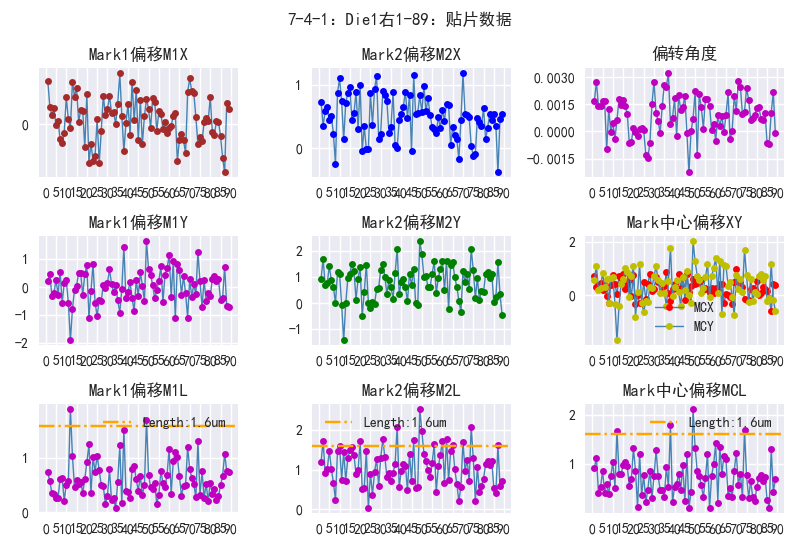

In [21]:
plt_data(data_calc[:89],Data_ID+'：Die1右1-89')

In [22]:
data_calc.iloc[:89,:].describe()

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.067615,0.001854,0.481654,0.769209,0.274635,0.385531,0.000845,0.608990,1.067365,0.740886
std,0.352976,0.609804,0.342691,0.663402,0.321763,0.623491,0.001093,0.354960,0.488220,0.404632
min,-0.782000,-1.905883,-0.390000,-1.438000,-0.586000,-1.671942,-0.002260,0.068039,0.027659,0.109276
25%,-0.176839,-0.395000,0.305000,0.334000,0.073080,-0.055500,0.000040,0.342713,0.703259,0.442164
50%,0.063161,0.052000,0.492000,0.872131,0.274580,0.431624,0.000898,0.528350,1.018835,0.728628
75%,0.324000,0.398000,0.721852,1.179000,0.480500,0.724500,0.001680,0.760729,1.402197,0.954147
max,0.828000,1.651000,1.191000,2.378000,0.969500,2.014500,0.003205,1.906919,2.521667,2.109374


#### Die1左90-157

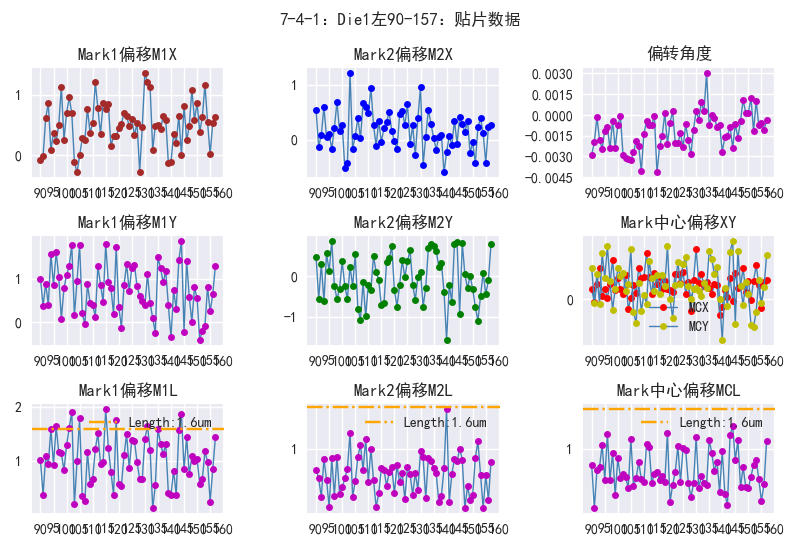

In [23]:
plt_data(data_calc[89:],Data_ID+'：Die1左90-157')

In [24]:
data_calc.iloc[89:,:].describe()

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L,MCL
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.494927,0.733906,0.164598,-0.077123,0.329763,0.328391,-0.001159,1.027268,0.619405,0.687712
std,0.376009,0.591638,0.360708,0.559190,0.294640,0.512414,0.001327,0.464385,0.294870,0.298648
min,-0.289000,-0.427000,-0.602000,-1.559000,-0.367000,-0.958500,-0.004155,0.120900,0.133929,0.117606
25%,0.256500,0.343500,-0.075145,-0.500000,0.159500,0.002500,-0.002126,0.667047,0.347341,0.486723
50%,0.502500,0.784208,0.152500,-0.125000,0.342250,0.306500,-0.000980,1.004122,0.638643,0.599975
75%,0.695250,1.196250,0.388000,0.356826,0.501099,0.637615,-0.000388,1.378844,0.829120,0.941717
max,1.363000,1.876416,1.209000,0.840000,1.160500,1.343861,0.003007,1.964636,1.575875,1.344279


### 数据存储

In [25]:
# ID = Data_ID
# TotalData = pd.read_excel('../D1TotalData.xlsx',sheet_name=None,header=0,index_col = 0)
# with pd.ExcelWriter("../D1TotalData.xlsx") as writer:    
#     TotalData['X'][ID] = data_calc['MCX'].values
#     TotalData['X'].to_excel(writer, sheet_name="X")
#     TotalData['Y'][ID] = data_calc['MCY'].values
#     TotalData['Y'].to_excel(writer, sheet_name="Y")
#     TotalData['Angle'][ID] = data_calc['M_R'].values
#     TotalData['Angle'].to_excel(writer, sheet_name="Angle")
#     TotalData['M1X'][ID] = data_calc['M1X'].values
#     TotalData['M1X'].to_excel(writer, sheet_name="M1X")
#     TotalData['M1Y'][ID] = data_calc['M1Y'].values
#     TotalData['M1Y'].to_excel(writer, sheet_name="M1Y")
#     TotalData['M2X'][ID] = data_calc['M2X'].values
#     TotalData['M2X'].to_excel(writer, sheet_name="M2X")
#     TotalData['M2Y'][ID] = data_calc['M2Y'].values
#     TotalData['M2Y'].to_excel(writer, sheet_name="M2Y")

### Map

In [26]:
V_data = pd.concat([data_calc,data0],axis=1,join = "inner")
#V_data

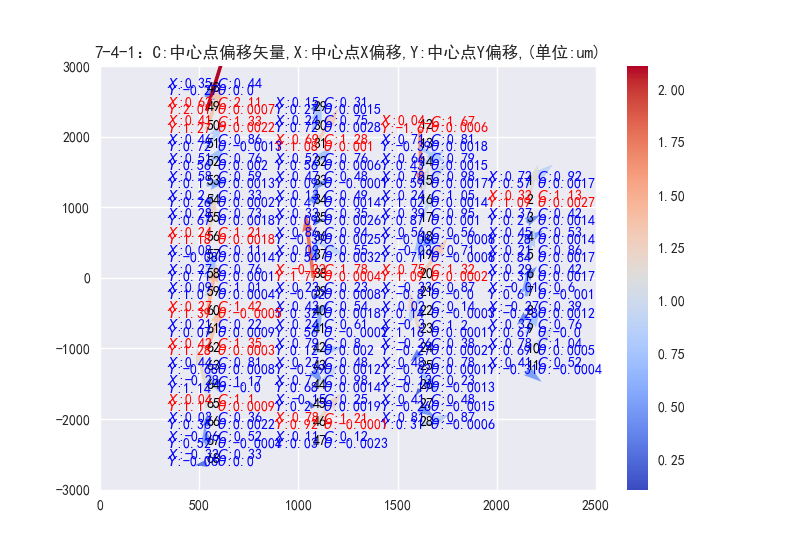

In [27]:
plt_XYmap68(V_data.iloc[:68,:],Data_ID)

In [28]:
R68_pass = len(V_data.iloc[:68,:-3][V_data.iloc[:68,:-3] < 1.6].dropna())
R68_EVG_detect = len(data_EVG.iloc[:68,:].dropna())
print(f'R68_pass:{R68_pass}\nR68_EVG_detect:{R68_EVG_detect}\nR68_pass_rite:{R68_pass/R68_EVG_detect}')

R68_pass:56
R68_EVG_detect:68
R68_pass_rite:0.8235294117647058


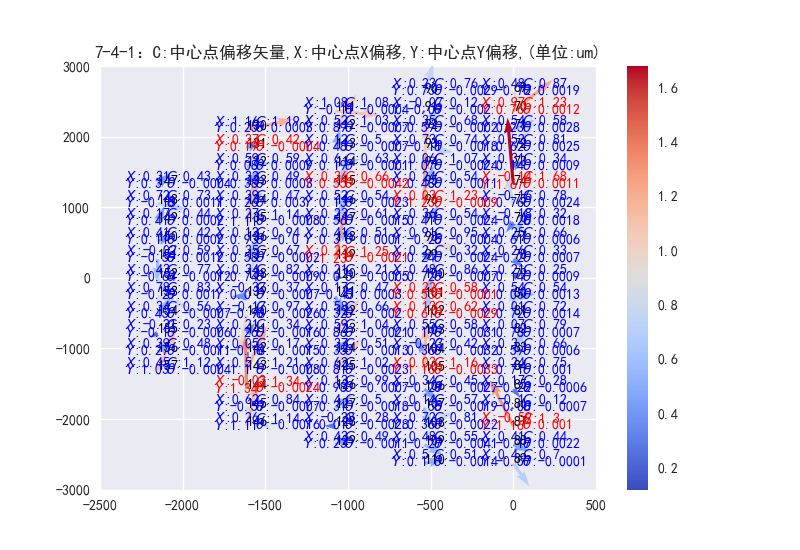

In [29]:
plt_XYmap69(V_data.iloc[68:,:],Data_ID)

In [30]:
R89_pass = len(V_data.iloc[68:,:-3][V_data.iloc[68:,:-3] < 1.6].dropna())
R89_EVG_detect = len(data_EVG.iloc[68:,:].dropna())
print(f'R89_pass:{R89_pass}\nR89_EVG_detect:{R89_EVG_detect}\nR89_pass_rite:{R89_pass/R89_EVG_detect}')

R89_pass:78
R89_EVG_detect:89
R89_pass_rite:0.8764044943820225


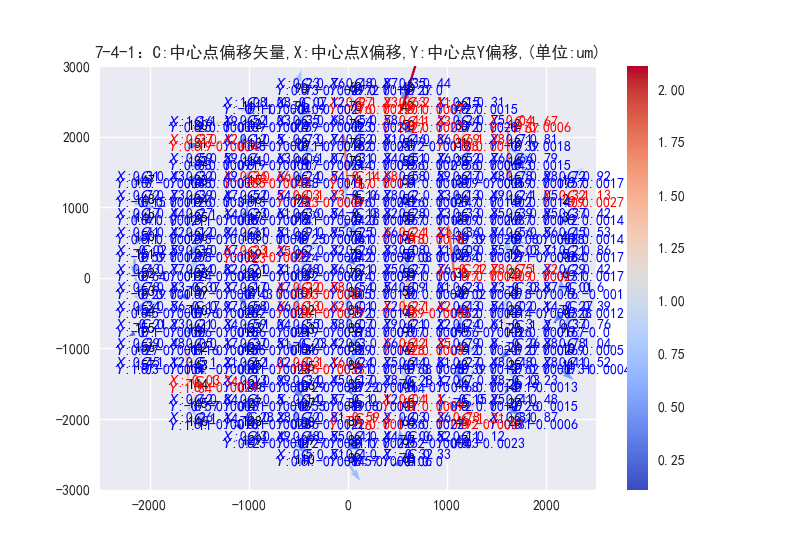

In [31]:
plt_XYmap157(V_data,Data_ID)

### 合格率

In [32]:
data_pass = data_calc.iloc[:,:-1].copy()
data_pass["M1L"] = (data_pass["M1X"]**2 + data_pass["M1Y"]**2)**0.5
data_pass["M2L"] = (data_pass["M2X"]**2 + data_pass["M2Y"]**2)**0.5
data_pass = data_pass[data_pass < 1.6].dropna()
#data_pass

In [33]:
data_pass.describe()

,M1X,M1Y,M2X,M2Y,MCX,MCY,M_R,M1L,M2L
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.254230,0.201148,0.356484,0.301959,0.305357,0.251553,-0.000008,0.703906,0.777416
std,0.413176,0.611465,0.354772,0.636684,0.302581,0.473853,0.001522,0.388945,0.377107
min,-0.636000,-1.105000,-0.602000,-1.559000,-0.367000,-0.958500,-0.004053,0.068039,0.027659
25%,-0.021879,-0.256896,0.106500,-0.187000,0.127130,-0.088375,-0.000961,0.372339,0.513823
50%,0.246000,0.195208,0.354000,0.340000,0.324615,0.268604,-0.000025,0.606175,0.719984
75%,0.533000,0.594250,0.556250,0.785826,0.495974,0.598125,0.001242,1.007297,1.046181
max,1.363000,1.589000,1.209000,1.518000,1.160500,1.157500,0.003205,1.591166,1.586824


In [34]:
print(f'Length<1.6um个数：{len(data_pass)} \nEVG检测到的个数：{len(data_EVG.dropna())} \n1.6um合格率：{ len(data_pass) / len(data_EVG.dropna()) }')

Length<1.6um个数：134 
EVG检测到的个数：157 
1.6um合格率：0.8535031847133758


In [35]:
print(f'Length<1.13um个数：{len(data_pass[data_pass < 1.13].dropna())} \nEVG检测到的个数：{len(data_EVG.dropna())} \n1.13um合格率：{ len(data_pass[data_pass < 1.13].dropna()) / len(data_EVG.dropna()) }')

Length<1.13um个数：83 
EVG检测到的个数：157 
1.13um合格率：0.5286624203821656


In [36]:
print(f'Length<0.707um个数：{len(data_pass[data_pass < 0.707].dropna())} \nEVG检测到的个数：{len(data_EVG.dropna())} \n0.707um合格率：{ len(data_pass[data_pass < 0.707].dropna()) / len(data_EVG.dropna()) }')

Length<0.707um个数：23 
EVG检测到的个数：157 
0.707um合格率：0.1464968152866242


In [37]:
print(f'Length<0.283um个数：{len(data_pass[data_pass < 0.283].dropna())} \nEVG检测到的个数：{len(data_EVG.dropna())} \n0.283um合格率：{ len(data_pass[data_pass < 0.283].dropna()) / len(data_EVG.dropna()) }')

Length<0.283um个数：0 
EVG检测到的个数：157 
0.283um合格率：0.0


### 计算chip合格率
(Die1+Die2合格交集)/(EVG_D1+EVG_D2交集)

In [38]:
#先看合格索引
D1_pass = data_pass.index.to_list()
D1_pass_800 = data_pass[data_pass < 1.13].dropna().index.to_list()
D1_pass_500 = data_pass[data_pass < 0.707].dropna().index.to_list()
%store D1_pass
%store D1_pass_800
%store D1_pass_500
#D1EVG检测索引
D1_EVG_pass = data_EVG.dropna().index.to_list()
%store D1_EVG_pass

Stored 'D1_pass' (list)
Stored 'D1_pass_800' (list)
Stored 'D1_pass_500' (list)
Stored 'D1_EVG_pass' (list)


### TG_D4指标
X：维度1，X方向整体偏移，目标$1\sigma<=0.8$\
Y：维度2，Y方向整体偏移, 目标$1\sigma<=0.8$\
$\theta$：维度3，角度整体偏移, 目标$1\sigma<=0.00001458$\
R：维度4，芯片Mark间距缩放, 目标$1\sigma<=0.00001458$

In [39]:
EVG_inv = sl.inv(np.array([[1,0, 5772.75,-5869.5],                           
                           [0,1, 5869.5 , 5772.75],
                           [1,0,-5772.75, 5869.5],
                           [0,1,-5869.5 ,-5772.5]]))
data_EVG.loc[[],:] = np.nan
TG_D4 = pd.DataFrame(np.dot(EVG_inv,data_EVG.T).T,index=data_EVG.index,columns=['X','Y',r'$\theta$','R'])
TG_D4['R'] = TG_D4['R']*(5772.75**2 + 5869.5**2)**0.5/2
TG_D4['L'] = (TG_D4['X']**2 + TG_D4['Y']**2)**0.5
TG_D4[r'$\theta L$'] = np.sin(TG_D4[r'$\theta$'])*(5772.75**2 + 5869.5**2)**0.5
describe = TG_D4.describe()
describe.loc["max-min"] = TG_D4.max()-TG_D4.min()
Scroe = (describe.loc['std','X']**2 + describe.loc['std','Y']**2 + describe.loc['std',r'$\theta L$']**2 + describe.loc['std','R']**2)**0.5
ScroeX = (describe.loc['std','X']**2 + describe.loc['std',r'$\theta L$']**2 + (describe.loc['std','R'])**2)**0.5
ScroeY = (describe.loc['std','Y']**2 + describe.loc['std',r'$\theta L$']**2 + (describe.loc['std','R'])**2)**0.5
print(f"整体标准差：{Scroe},{ScroeX},{ScroeY},{(ScroeX**2+ScroeY**2)**0.5}")
describe

整体标准差：0.8901766637261533,0.7589477030777478,0.5324757869176473,0.9271095294842767


,X,Y,$\theta$,R,L,$\theta L$
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,-0.158293,-0.026071,0.000007,-0.174554,0.770261,0.056161
std,0.713361,0.465202,0.000030,0.083674,0.392547,0.245186
min,-2.014500,-1.283499,-0.000081,-0.360093,0.109281,-0.666954
25%,-0.665500,-0.335993,-0.000010,-0.221353,0.446987,-0.080075
50%,-0.136000,-0.005497,0.000012,-0.201638,0.739557,0.098881
75%,0.308000,0.320007,0.000029,-0.134478,1.040776,0.236884
max,1.237000,0.969507,0.000071,0.055983,2.109376,0.582296
max-min,3.251500,2.253007,0.000152,0.416076,2.000096,1.249250


In [40]:
#data_EVG.to_excel(data_EVG+'EVG.xlsx')